# 数据预处理

In [1]:
import urllib.request
import os
import tarfile
import pandas as pd
import numpy as np
import xlrd

In [2]:
all_df = pd.read_excel('titanic3.xls')

In [3]:
cols = ['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
all_df  = all_df[cols]

In [4]:
msk = np.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [5]:
print('total:', len(all_df), 'train:', len(train_df), 'test:', len(test_df))

total: 1309 train: 1047 test: 262


In [6]:
from sklearn import preprocessing
def PreprocessData(raw_df):
    df = raw_df.drop(['name'], axis = 1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fear_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fear_mean)
    df['sex'] = df['sex'].map({'female':0, 'male':1}).astype(int)
    x_OneHot_df =pd.get_dummies(data = df, columns=['embarked'])
    
    ndarray = x_OneHot_df.values
    features = ndarray[:, 1:]
    label = ndarray[:, 0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledfeatures = minmax_scale.fit_transform(features)
    
    return scaledfeatures, label

In [7]:
train_features, train_label = PreprocessData(train_df)
test_features, test_label = PreprocessData(test_df)

# 建立模型

导入所需模块

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=40, input_dim = 9, kernel_initializer='uniform', activation='relu'))

In [11]:
model.add(Dense(units=30, kernel_initializer='uniform', activation='relu'))

In [12]:
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# 开始训练

定义训练方式

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
train_history = model.fit(x = train_features, y = train_label, validation_split= 0.1, 
                          epochs=30, batch_size=30, verbose=2)

Train on 942 samples, validate on 105 samples
Epoch 1/30
 - 0s - loss: 0.6898 - acc: 0.5849 - val_loss: 0.6705 - val_acc: 0.7619
Epoch 2/30
 - 0s - loss: 0.6662 - acc: 0.6168 - val_loss: 0.5971 - val_acc: 0.7619
Epoch 3/30
 - 0s - loss: 0.6056 - acc: 0.6847 - val_loss: 0.5140 - val_acc: 0.7810
Epoch 4/30
 - 0s - loss: 0.5395 - acc: 0.7601 - val_loss: 0.4866 - val_acc: 0.7810
Epoch 5/30
 - 0s - loss: 0.5052 - acc: 0.7665 - val_loss: 0.4848 - val_acc: 0.7810
Epoch 6/30
 - 0s - loss: 0.4955 - acc: 0.7665 - val_loss: 0.4700 - val_acc: 0.7810
Epoch 7/30
 - 0s - loss: 0.4890 - acc: 0.7622 - val_loss: 0.4579 - val_acc: 0.7810
Epoch 8/30
 - 0s - loss: 0.4850 - acc: 0.7675 - val_loss: 0.4571 - val_acc: 0.7810
Epoch 9/30
 - 0s - loss: 0.4833 - acc: 0.7622 - val_loss: 0.4497 - val_acc: 0.7619
Epoch 10/30
 - 0s - loss: 0.4786 - acc: 0.7781 - val_loss: 0.4539 - val_acc: 0.7905
Epoch 11/30
 - 0s - loss: 0.4761 - acc: 0.7792 - val_loss: 0.4549 - val_acc: 0.7810
Epoch 12/30
 - 0s - loss: 0.4738 - acc:

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):#输入参数：训练产生的train_history,训练数据执行结果,验证数据执行结果
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')#显示图例，且位于左上角
    plt.show()

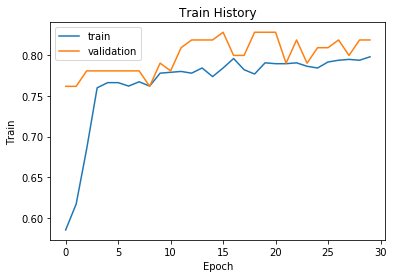

In [16]:
show_train_history(train_history, 'acc', 'val_acc')

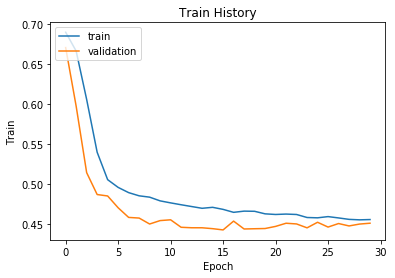

In [17]:
show_train_history(train_history, 'loss', 'val_loss')

# 评估模型准确率

In [18]:
scores = model.evaluate(x = test_features, y = test_label)
scores[1]

262/262 [==============================] - 0s 41us/step


0.8206106870229007

# 加入《泰坦尼克号》电影中Jack和Rose的数据

In [19]:
Jack = pd.Series([0, 'Jack', 3, 'male', 23, 1, 0, 5.0000, 'S'])
Rose = pd.Series([1, 'Rose', 1, 'female', 20, 1, 0, 100.0000, 'S'])

In [20]:
JR_df = pd.DataFrame([list(Jack), list(Rose)], 
                     columns=['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'])

In [21]:
all_df = pd.concat([all_df, JR_df])

In [22]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


# 进行预测

In [23]:
all_features, all_label = PreprocessData(all_df)

In [24]:
all_probability = model.predict(all_features)

In [25]:
all_probability[: 10]

array([[0.96766245],
       [0.55924267],
       [0.9692486 ],
       [0.3608517 ],
       [0.96271783],
       [0.25236556],
       [0.92548406],
       [0.3095172 ],
       [0.9257965 ],
       [0.2707222 ]], dtype=float32)

将all_df和all_probability整合

In [26]:
pd1 = all_df
pd1.insert(len(all_df.columns), 'probability', all_probability)

In [27]:
pd1[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.138538
1,1,Rose,1,female,20.0,1,0,100.0,S,0.963817


# 找出泰坦尼克号背后的感人故事

In [28]:
pd1[(pd1['survived'] == 0) & (pd1['probability'] > 0.9)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.969249
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.962718
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.976324
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.972961
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.927653
